In [1]:
#!pip install graphviz
#!python3 -m pip install graphviz

## Objectives:
* Learn the concept of a decision tree?
* Build your own decision tree, see if you can beat your logistic regression score
* Use sklearn.tree.DecisionTreeClassifier for modelling
* Visualise a decision tree in graphviz

---

### Decision tree:
* Match the concepts to the diagram!

---

### Build your own Decision Tree

In [2]:
import pandas as pd


def import_data(data):
    _filedir = 'data/titanic/'
    _filename = 'train'
    _file = _filedir + _filename + '.csv'
    return _file


df = pd.read_csv(import_data('train'))
#df.head(1)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


a#### Lets create our own Decision tree using if statements

In [4]:
y = df['Survived']
y_pred = []

for i, row in df.iterrows():
    if row['Sex'] == 'male':
        y_pred.append(0)
    else:
        y_pred.append(1)     

In [5]:
len(y_pred)

891

#### How good is our model?

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.7867564534231201

--- 

### Use the DecisionTreeClassifier from sklearn

In [7]:
#create a list comprehension, where we convert every 'male' value into a 1, and every 'female' value into a zero, for each value in df['Sex']
#the basic list comp syntax is: [x for x in list]
df['Sex'] = [1 if x == 'male' else 0 for x in df['Sex']]

In [8]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

#we reshape our X data into a matrix, cos sklearn requires it!
X = np.array(df['Sex']).reshape(-1,1)
y = df['Survived']

m = DecisionTreeClassifier()
m.fit(X,y)
m.score(X,y)

0.7867564534231201

---

### Visualise the results using Graphviz

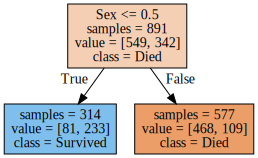

In [9]:
import graphviz
from sklearn.tree import export_graphviz
import os

tree = export_graphviz(m,
                      class_names=['Died', 'Survived'],
                      feature_names=['Sex'],
                      impurity=False,
                      filled=True  
                      )

graph = graphviz.Source(tree)
graph.render('titanic.csv') #list
graph